In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Diwali_Sales_Data.csv', encoding='ISO-8859-1')
# To show the first 5 rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# To know the numebr of rows and columns
df.shape

(11251, 15)

In [5]:
# To show the basic informations of the dataframe, this shows the data typw of each rows and show the count of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# As the columns Status and unnamed1 are empty and not having any value we need to drop as part of cleaning
df.drop(['Status', 'unnamed1'], axis = 1, inplace= True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
# To know whether any column is having null values or not
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(how = 'any', inplace=True)
df.shape

(11239, 13)

In [9]:
# As we are having amount as our float , now we will change it to int using astype

df['Amount'] = df['Amount'].astype('int')

In [10]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [11]:
# This will show the discription of all the numeric columns.
# Shows max, min, 25th percentile, 50th percentile, 75th percentile, mean, count, standard deviation
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
# This shows the information related to numeric and object datatype columns
df.describe(include= 'object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


## Exploratory Data Analysis

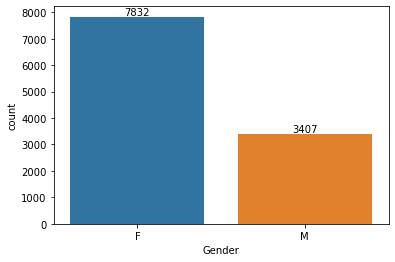

In [13]:
# To show the disrtibution of purchases of Male and Females

ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [14]:
# To know the amount spend by males and females

amt_gender = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

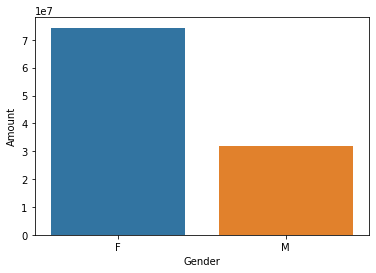

In [15]:
sns.barplot(x = 'Gender', y = 'Amount', data = amt_gender)

##### The above 2 graphs shows that Females have purchase more as compared to males

### Age Group

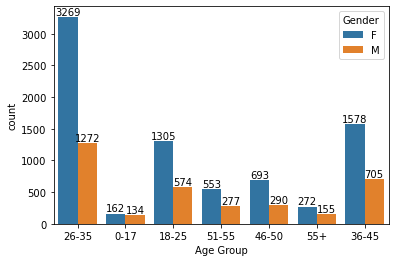

In [16]:
# To show the disrtibution of purchases as per age groups and also as per Gender

ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
# To know the amount spend as per Age group

amt_age_group = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
amt_age_group

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

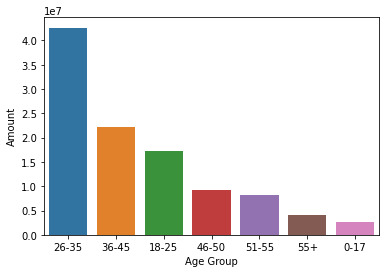

In [18]:
sns.barplot(x = 'Age Group', y = 'Amount', data = amt_age_group)

##### The above two graphs shows that most of the buyers are of age group 26-35 and females have purchased more

### Marital Status

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

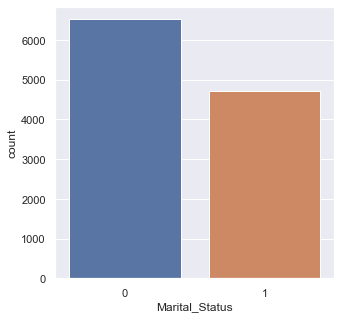

In [28]:
# To show the ordered purchased by a marital person and a non-marital person
sns.set(rc = {'figure.figsize': (5,5)} )
sns.countplot(x = 'Marital_Status', data = df)


#### This shows that maximum shopping is by married people as compared to un-married

In [30]:
Marital_sts = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
Marital_sts

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

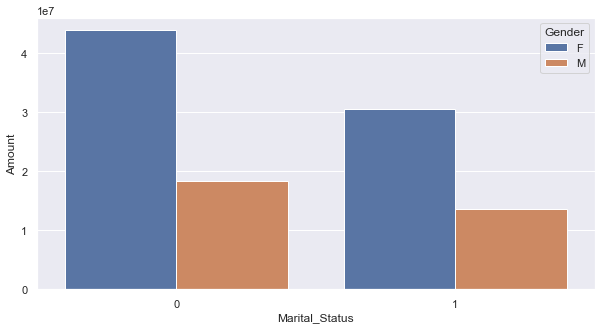

In [31]:
Marital_sts = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', data = Marital_sts, hue = 'Gender')

In [ ]:
#### Maximum amount spent by Married Womens

#### Occupations

<AxesSubplot:xlabel='Occupation', ylabel='count'>

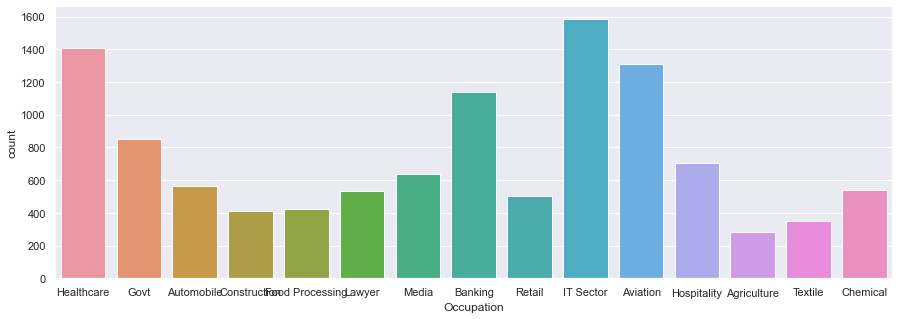

In [33]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.countplot(x = 'Occupation', data = df)

#### Maximum amount is spent by IT Sector persons, followed by Healthcare and Aviation secots

### State

In [19]:
# To know which are the top 10 states that have ordered maximum 

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<AxesSubplot:xlabel='State', ylabel='Orders'>

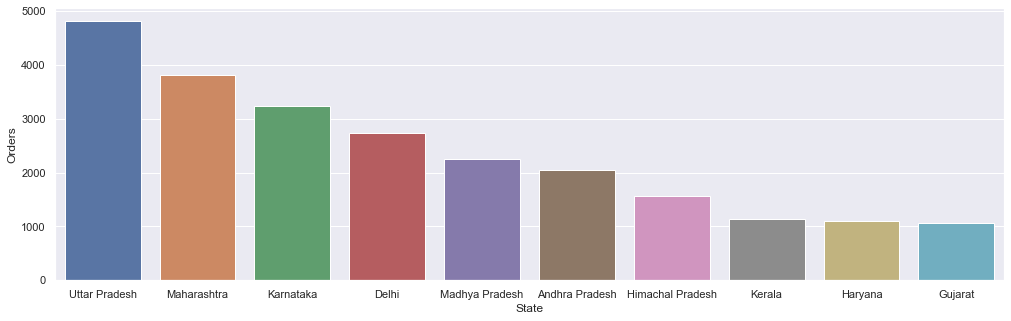

In [20]:
sns.set(rc = {'figure.figsize':(17,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state)

In [21]:
# To know which are the top 10 states that have spent more 

spent_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
spent_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<AxesSubplot:xlabel='State', ylabel='Amount'>

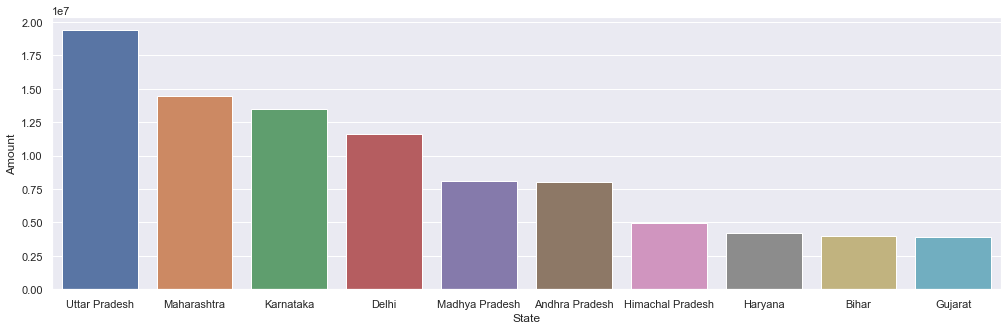

In [22]:
sns.set(rc = {'figure.figsize':(17,5)})
sns.barplot(x = 'State', y = 'Amount', data = spent_state)

#### From the above two graphs it can be concluded that Uttar Pradesh, Maharashtra and Karnataka are the top three states in case of spending amount and purchasing.

### Product Category

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

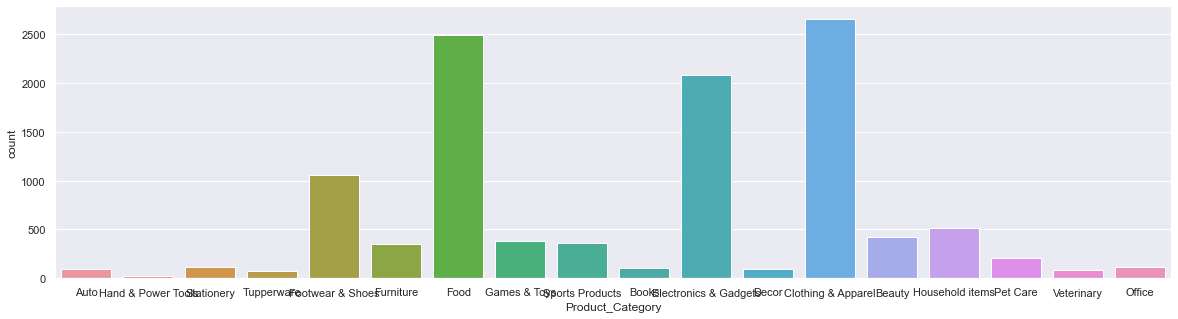

In [37]:
sns.set(rc= {'figure.figsize': (20,5)})
sns.countplot(x = df['Product_Category'])

#### Maximum sold item is Clothing then food and then electronics

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

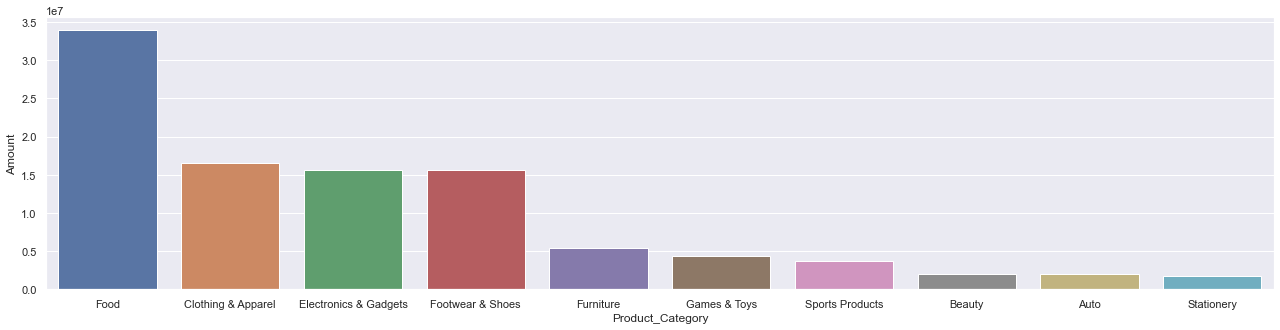

In [42]:
sales_prod = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize': (22,5)})

sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_prod)

In [ ]:
#### Maximum amount is spent on food as compared to clothing and electronic gadgets

### Product_ID

<AxesSubplot:xlabel='Product_ID', ylabel='Amount'>

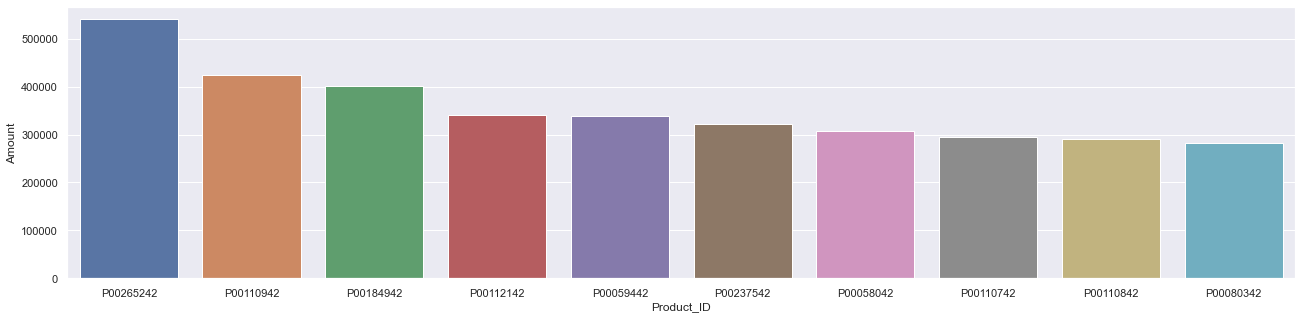

In [43]:
sales_prod = df.groupby(['Product_ID'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize': (22,5)})

sns.barplot(x = 'Product_ID', y = 'Amount', data = sales_prod)

#### Summary

#### Married Women age group 26-35 years from Uttar Pradesh, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products like Food, Clothing and Electronic Gadgets
